In [89]:
from collections import deque
import copy

In [73]:
from graphviz import Digraph

def graph_file_binomiale(file):
    dot = Digraph()

    def traverse(arbre):
        if arbre is None:
            return

        dot.node(str(arbre.cle), label=str(arbre.cle))

        for enfant in arbre.enfants:
            dot.edge(str(arbre.cle), str(enfant.cle))
            traverse(enfant)

    for arbre in file.arbres:
        traverse(arbre)

    return dot


In [107]:
class ArbreBinomial:
    def __init__(self, cle = None):
        self.cle = cle
        self.parent = None
        self.enfants = deque()
        self.degree = 0
    
    def estVide(self) -> bool:
        '''ArbreBinomial -> bool'''
        '''Verifie si l'arbre est vide ou non'''
        return self.cle is None
    
    def union_arbre(self, arbre: 'ArbreBinomial') -> 'ArbreBinomial':
        '''ArbreBinomial * ArbreBinomial -> ArbreBinomial'''
        '''Union de deux arbres binomiaux de même degré'''
        if (self.degree != arbre.degree):
            raise ValueError("Les arbres n'ont pas le même degré")
        if self.cle < arbre.cle:
            nouveauArbre = ArbreBinomial(self.cle)
            nouveauArbre.enfants = copy.deepcopy(self.enfants)
            nouveauArbre.enfants.appendleft(arbre)
            nouveauArbre.parent = self
            nouveauArbre.degree = self.degree + 1
            return nouveauArbre
        else:
            nouveauArbre = ArbreBinomial(arbre.cle)
            nouveauArbre.enfants = copy.deepcopy(arbre.enfants)
            nouveauArbre.enfants.appendleft(self)
            nouveauArbre.parent = arbre
            nouveauArbre.degree = arbre.degree + 1
            return nouveauArbre

    def decapitate(self) -> 'FileBinomiale':
        '''ArbreBinomial -> FileBinomiale'''
        '''Retire la racine de l'arbre et renvoie un file contenant les sous-arbres'''
        file = FileBinomiale()
        for enfant in self.enfants:
            enfant.parent = None
            file.arbres.append(enfant)
        return file

    def transformation_file(self) -> 'FileBinomiale':
        '''ArbreBinomial -> FileBinomiale'''
        '''Transforme un arbre en file'''
        file = FileBinomiale()
        file.arbres = [self]
        return file

class FileBinomiale:
    def __init__(self):
        self.arbres = deque()  # liste d'arbres binomiaux

    #AJOUT
    def ajout_liste(self, liste: list) -> 'FileBinomiale':
        '''FileBinomiale * list -> FileBinomiale'''
        '''Ajoute une liste de clés à la file'''
        file = self
        for cle in liste:
            file = file.ajout(cle)
        return file
    
    def ajout(self, cle) -> 'FileBinomiale':
        '''FileBinomiale * int -> FileBinomiale'''
        '''Ajoute une clé à la file'''
        nouvelleFile = FileBinomiale()
        nouvelleFile.arbres = copy.deepcopy(self.arbres)
        resultat = nouvelleFile.unionFile(ArbreBinomial(cle).transformation_file())
        nouvelleFile.arbres = resultat.arbres
        return resultat
    
    #SUPPRESSION
    def extractMin(self) ->(int, 'ArbreSplay'):
        '''FileBinomiale -> int * FileBinomiale'''
        '''Supprime et renvoie la clé minimale de la file'''
        nouvelleFile = FileBinomiale()
        nouvelleFile.arbres = copy.deepcopy(self.arbres)
        if self.estVide():
            return None
        arbreMin = nouvelleFile.arbres[0]
        for arbre in nouvelleFile.arbres:
            if arbre.cle < arbreMin.cle:
                arbreMin = arbre
        nouvelleFile.arbres.remove(arbreMin)
        if (len(nouvelleFile.arbres) == 0):
            nouvelleFile.arbres = arbreMin.decapitate().arbres
        else:
            nouvelleFile.arbres = FileBinomiale.unionFile(nouvelleFile, arbreMin.decapitate()).arbres
        return arbreMin.cle, nouvelleFile
    
    #UNION
    def unionFile(self, file: 'FileBinomiale') -> 'FileBinomiale':
        '''FileBinomiale * FileBinomiale -> FileBinomiale'''
        '''Union de deux files binomiales'''
        nouvelleFile = FileBinomiale()
        nouvelleFile.arbres = copy.deepcopy(self.arbres)
        resultat = FileBinomiale._union(nouvelleFile, file, ArbreBinomial())
        nouvelleFile.arbres = copy.deepcopy(resultat.arbres)
        return nouvelleFile

    def _union(file1: 'FileBinomiale', file2: 'FileBinomiale', arbre: 'ArbreBinomial') -> 'FileBinomiale':
        '''FileBinomiale * FileBinomiale * ArbreBinomial -> FileBinomiale'''
        '''Fonction auxiliaire pour l'union de deux files binomiales'''
        if arbre.estVide():
            if file1.estVide():
                return file2
            if file2.estVide():
                return file1

            arbre1 = file1.minDeg()
            arbre2 = file2.minDeg()

            if (arbre1.degree < arbre2.degree):
                return FileBinomiale._ajoutMin(FileBinomiale.unionFile(file1._reste(), file2), arbre1)
            if (arbre2.degree < arbre1.degree):
                return FileBinomiale._ajoutMin(FileBinomiale.unionFile(file1, file2._reste()), arbre2)
            if (arbre1.degree == arbre2.degree):
                return FileBinomiale._union(file1._reste(), file2._reste(), ArbreBinomial.union_arbre(arbre1, arbre2))
        else:
            if (file1.estVide()):
                return FileBinomiale.unionFile(file2, arbre.transformation_file())
            if (file2.estVide()):
                return FileBinomiale.unionFile(file1, arbre.transformation_file())

            arbre1 = file1.minDeg()
            arbre2 = file2.minDeg()

            if (arbre.degree < arbre1.degree and arbre.degree < arbre2.degree):
                return FileBinomiale._ajoutMin(FileBinomiale.unionFile(file1, file2), arbre)
            if (arbre.degree == arbre1.degree and arbre.degree == arbre2.degree):
                return FileBinomiale._ajoutMin(FileBinomiale._union(file1._reste(), file2._reste(), ArbreBinomial.union_arbre(arbre1, arbre2)), arbre)
            if (arbre.degree == arbre1.degree and arbre.degree < arbre2.degree):
                return FileBinomiale._union(file1._reste(), file2, ArbreBinomial.union_arbre(arbre1, arbre))
            if (arbre.degree == arbre2.degree and arbre.degree < arbre1.degree):
                return FileBinomiale._union(file1, file2._reste(), ArbreBinomial.union_arbre(arbre2, arbre))
            
    
    #FONCTIONS UTILES / PRIMITIVES
    def estVide(self) -> bool:
        '''FileBinomiale -> bool'''
        '''Verifie si la file est vide ou non'''
        return self is None or len(self.arbres) == 0

    def minDeg(self) -> 'ArbreBinomial':
        '''FileBinomiale -> ArbreBinomial'''
        '''Renvoie l'arbre de degré minimum de la file'''
        minDeg = self.arbres[0]
        for arbre in self.arbres:
            if arbre.degree < minDeg.degree:
                minDeg = arbre
        return minDeg
    
    def _reste(self) -> 'FileBinomiale':
        '''FileBinomiale -> FileBinomiale'''
        '''Retourne la file sans l'arbre de degré minimum'''
        minDeg = self.minDeg()
        self.arbres.remove(minDeg)
        return self
        
    def _ajoutMin(self, arbre: 'ArbreBinomial') -> 'FileBinomiale':
        '''FileBinomiale * ArbreBinomial -> FileBinomiale'''
        '''Ajoute un arbre à la file'''
        nouvelleFile = FileBinomiale()
        nouvelleFile.arbres = copy.deepcopy(self.arbres)
        nouvelleFile.arbres.append(arbre)
        return nouvelleFile


    


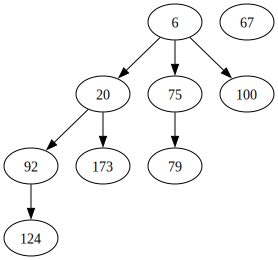

In [108]:
# Create an instance of FileBinomiale
file = FileBinomiale()

# Add the arbre to the file_binomiale
file = file.ajout_liste([173,20,92,124,100,6,79,75,67])

dot = graph_file_binomiale(file)
dot

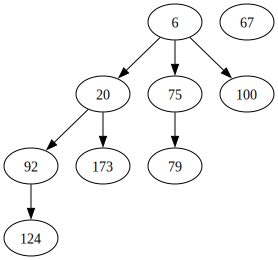

In [109]:
A = file.ajout(60) # Ajout de 60 dans A, file n'est pas modifié
dot = graph_file_binomiale(file)
dot

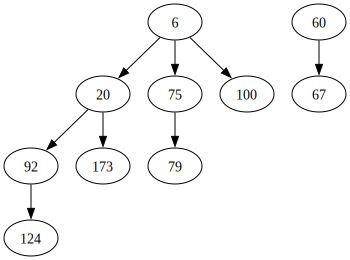

In [110]:
dot = graph_file_binomiale(A) # A est modifié
dot

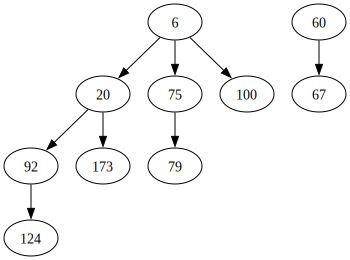

In [111]:
e,B = A.extractMin() # Extraction du minimum de A = 6
dot = graph_file_binomiale(A) # A n'est pas modifié
dot

6


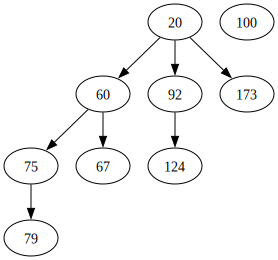

In [112]:
print(e)
dot = graph_file_binomiale(B) # B est modifié
dot